# Monthly wise top performing and top non performing stocks.

# Author: Parth Salke

In [9]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv("C:\\Users\\Parth Salke\\Downloads\\Datasets\\Equity Data (1 Jan 2020).csv")

# Exploratory Data Analysis

In [11]:
data.head(5)

,DATE1,SYMBOL,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
0,11-02-2022,NETFLTGILT,22.40,22.02,22.48,22.02,22.25,22.27,22.25,16697,3.72,83,12968.0,77.67
1,11-02-2022,NETFMID150,116.02,119.50,119.50,113.61,114.10,113.95,114.68,224822,257.82,1780,200777.0,89.30
2,11-02-2022,NETFNIF100,183.49,178.50,184.98,178.50,182.05,182.22,182.07,2354,4.29,135,2140.0,90.91
3,11-02-2022,NETFDIVOPP,45.63,46.25,46.25,45.07,45.33,45.09,45.40,1239,0.56,86,1122.0,90.56
4,11-02-2022,NETFGILT5Y,49.66,49.66,49.82,49.47,49.82,49.79,49.72,82821,41.18,322,74512.0,89.97


In [12]:
data.tail(5)

,DATE1,SYMBOL,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
809334,01-01-2020,ORTINLABSS,9.90,10.15,10.15,9.80,9.85,9.80,9.84,5041,0.50,26,4283.0,84.96
809335,01-01-2020,ORISSAMINE,1281.50,1270.00,1288.00,1259.35,1264.00,1265.60,1268.53,8230,104.40,626,4091.0,49.71
809336,01-01-2020,OSWALAGRO,4.95,5.15,5.40,5.00,5.20,5.30,5.18,27820,1.44,143,17849.0,64.16
809337,01-01-2020,PAISALO,433.00,429.95,438.00,427.45,429.95,428.85,432.68,37838,163.72,505,8873.0,23.45
809338,01-01-2020,PAGEIND,23393.10,23350.00,23799.00,23241.10,23600.00,23602.15,23601.26,16716,3945.19,6464,2964.0,17.73


In [13]:
data.isnull().sum()

 DATE1            0
SYMBOL            0
 PREV_CLOSE       0
 OPEN_PRICE       0
 HIGH_PRICE       0
 LOW_PRICE        0
 LAST_PRICE       0
 CLOSE_PRICE      0
 AVG_PRICE        0
 TTL_TRD_QNTY     0
 TURNOVER_LACS    0
 NO_OF_TRADES     0
 DELIV_QTY        3
 DELIV_PER        3
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809339 entries, 0 to 809338
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    DATE1          809339 non-null  object 
 1   SYMBOL          809339 non-null  object 
 2    PREV_CLOSE     809339 non-null  float64
 3    OPEN_PRICE     809339 non-null  float64
 4    HIGH_PRICE     809339 non-null  float64
 5    LOW_PRICE      809339 non-null  float64
 6    LAST_PRICE     809339 non-null  float64
 7    CLOSE_PRICE    809339 non-null  float64
 8    AVG_PRICE      809339 non-null  float64
 9    TTL_TRD_QNTY   809339 non-null  int64  
 10   TURNOVER_LACS  809339 non-null  float64
 11   NO_OF_TRADES   809339 non-null  int64  
 12   DELIV_QTY      809336 non-null  float64
 13   DELIV_PER      809336 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 86.4+ MB


In [15]:
data.describe()

,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
count,809339.000000,809339.000000,809339.000000,809339.000000,809339.000000,809339.000000,809339.000000,8.093390e+05,8.093390e+05,8.093390e+05,8.093360e+05,809336.000000
mean,668.820979,670.839406,682.637098,658.268809,669.363227,669.326862,670.396131,1.862044e+06,3.986382e+03,1.273804e+04,6.385195e+05,55.979340
std,2721.045148,2727.110313,2764.114183,2686.341895,2721.562123,2721.971042,2724.541708,1.778833e+07,1.913021e+04,3.770547e+04,4.837947e+06,20.198535
min,0.050000,0.050000,0.100000,0.050000,0.050000,0.050000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000
25%,44.200000,44.550000,45.700000,43.150000,44.300000,44.300000,44.420000,1.891600e+04,1.812000e+01,3.730000e+02,1.129200e+04,41.960000
50%,146.600000,147.450000,150.950000,143.500000,146.850000,146.750000,147.220000,9.747100e+04,1.562100e+02,2.018000e+03,5.190700e+04,55.710000
75%,478.650000,480.400000,491.000000,470.000000,479.000000,479.200000,480.400000,5.402470e+05,1.094525e+03,8.835000e+03,2.458908e+05,69.280000
max,96973.850000,96770.000000,98599.950000,92750.000000,97688.000000,96973.850000,94963.570000,6.161122e+09,3.564334e+06,2.428917e+06,7.870864e+08,100.000000


In [16]:
data.shape

(809339, 14)

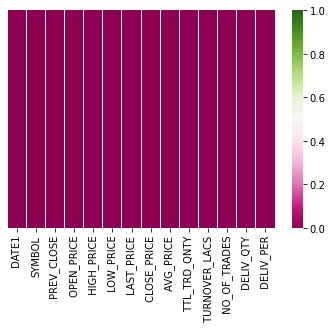

In [17]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="PiYG")

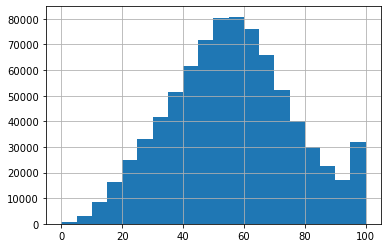

In [18]:
data[' DELIV_PER'].hist(bins=20)

# Data Processing

In [19]:
data["CHANGE"]=(((data[" CLOSE_PRICE"]-data[" PREV_CLOSE"])/data[" PREV_CLOSE"])*100)

In [20]:
data=data.drop([" NO_OF_TRADES"," DELIV_QTY"," DELIV_PER"], axis=1)

In [21]:
data.head(3)

,DATE1,SYMBOL,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,CHANGE
0,11-02-2022,NETFLTGILT,22.40,22.02,22.48,22.02,22.25,22.27,22.25,16697,3.72,-0.580357
1,11-02-2022,NETFMID150,116.02,119.50,119.50,113.61,114.10,113.95,114.68,224822,257.82,-1.784175
2,11-02-2022,NETFNIF100,183.49,178.50,184.98,178.50,182.05,182.22,182.07,2354,4.29,-0.692136


In [22]:
data[' DATE1'] = pd.to_datetime(data[' DATE1'], dayfirst=True)
data['MONTH'] = pd.DatetimeIndex(data[' DATE1']).month
data['YEAR'] = pd.DatetimeIndex(data[' DATE1']).year
data=data.sort_values(by=["SYMBOL","MONTH","YEAR"])

In [24]:
from pandasql import sqldf
q="select SYMBOL,MONTH,YEAR,avg(CHANGE) as change from data group by SYMBOL,YEAR,MONTH order by SYMBOL"
data1=sqldf(q, globals())
data1

,SYMBOL,MONTH,YEAR,change
0,20MICRONS,1,2020,0.000304
1,20MICRONS,2,2020,-0.534678
2,20MICRONS,3,2020,-0.751252
3,20MICRONS,4,2020,1.027580
4,20MICRONS,5,2020,-0.536147
...,...,...,...,...
41650,ZYDUSWELL,10,2021,-0.693857
41651,ZYDUSWELL,11,2021,-0.266966
41652,ZYDUSWELL,12,2021,-0.160813
41653,ZYDUSWELL,1,2022,-0.398216


In [28]:
data1=data1.sort_values(by=["YEAR","MONTH","change"])
data1

,SYMBOL,MONTH,YEAR,change
11947,GAYAHWS,1,2020,-9.090909
27993,PARSVNATH,1,2020,-6.666667
27104,OILCOUNTUB,1,2020,-5.263158
1072,AGROPHOS,1,2020,-5.157383
4821,BCP,1,2020,-4.761905
...,...,...,...,...
32857,SELMC,2,2022,4.984945
38845,UGARSUGAR,2,2022,5.077231
40824,WEIZMANIND,2,2022,5.387560
24026,MHLXMIRU,2,2022,8.218743


In [29]:
data1.to_excel("sorted_equity-data.xlsx")

# Results

In [30]:
q1="select symbol,month,year,max(change) from data1 group by year,month"
sqldf(q1, globals())

,SYMBOL,MONTH,YEAR,max(change)
0,INTEGRA,1,2020,16.666667
1,UVSL,2,2020,10.000000
2,KSERASERA,3,2020,13.157895
3,PRADIP,4,2020,11.397547
4,SEPOWER,5,2020,9.393939
5,CASTEXTECH,6,2020,10.207071
6,ROSSARI,7,2020,10.147587
7,CCCL,8,2020,14.093915
8,ROUTE,9,2020,16.056921
9,CASTEXTECH,10,2020,8.232680


In [31]:
q2="select symbol,month,year,min(change) from data1 group by year,month"
sqldf(q2, globals())

,SYMBOL,MONTH,YEAR,min(change)
0,GAYAHWS,1,2020,-9.090909
1,BIRLATYRE,2,2020,-8.343363
2,EBANK,3,2020,-41.240420
3,IRCON,4,2020,-4.302631
4,SURYALAXMI,5,2020,-7.196245
5,INDOTHAI,6,2020,-4.882846
6,XPROINDIA,7,2020,-8.500000
7,EICHERMOT,8,2020,-4.195377
8,VIKASMCORP,9,2020,-4.776977
9,SHRENIK,10,2020,-5.088548


In [32]:
data1.sort_values(by="change",ascending=False)

,SYMBOL,MONTH,YEAR,change
12869,GOCOLORS,11,2021,81.695652
36987,TATVA,7,2021,55.790726
21448,LATENTVIEW,11,2021,30.241681
30078,RAILTEL,2,2021,29.095745
40172,VINEETLAB,6,2021,19.958438
...,...,...,...,...
32695,SCHAEFFLER,2,2022,-9.298051
8150,CUBEXTUB,3,2020,-9.814990
33990,SIGACHI,11,2021,-11.437171
204,AAKASH,2,2022,-12.456280


In [33]:
high=data1.nlargest(10, 'change')

In [37]:
print(high)

           SYMBOL  MONTH  YEAR     change
12869    GOCOLORS     11  2021  81.695652
36987       TATVA      7  2021  55.790726
21448  LATENTVIEW     11  2021  30.241681
30078     RAILTEL      2  2021  29.095745
40172   VINEETLAB      6  2021  19.958438
5704     BLUECHIP      4  2021  18.988095
15187      HIRECT      1  2022  18.708995
4891   BECTORFOOD     12  2020  18.463369
25490      NAZARA      3  2021  18.350047
17707     INTEGRA      1  2020  16.666667


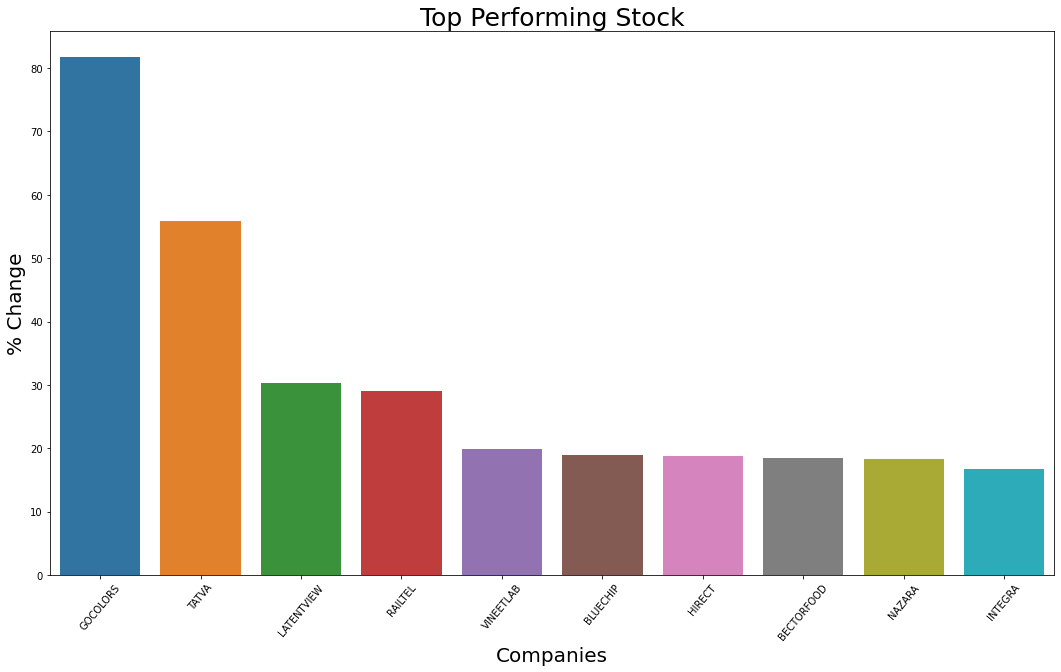

In [34]:
plt.figure(figsize = (18,10))
sns.barplot(x = high.SYMBOL, y = high.change)
plt.xticks(rotation = 50)
plt.xlabel('Companies',fontsize=20)
plt.ylabel('% Change',fontsize=20)
plt.title('Top Performing Stock',fontsize=25)
plt.show()

In [35]:
low=data1.nsmallest(10, 'change')

In [38]:
print(low)

           SYMBOL  MONTH  YEAR     change
9821        EBANK      3  2020 -41.240420
204        AAKASH      2  2022 -12.456280
33990     SIGACHI     11  2021 -11.437171
8150     CUBEXTUB      3  2020  -9.814990
32695  SCHAEFFLER      2  2022  -9.298051
11947     GAYAHWS      1  2020  -9.090909
4671        BASML      6  2021  -8.743211
41282   XPROINDIA      7  2020  -8.500000
5574    BIRLATYRE      2  2020  -8.343363
13486    GREENLAM      2  2022  -8.123949


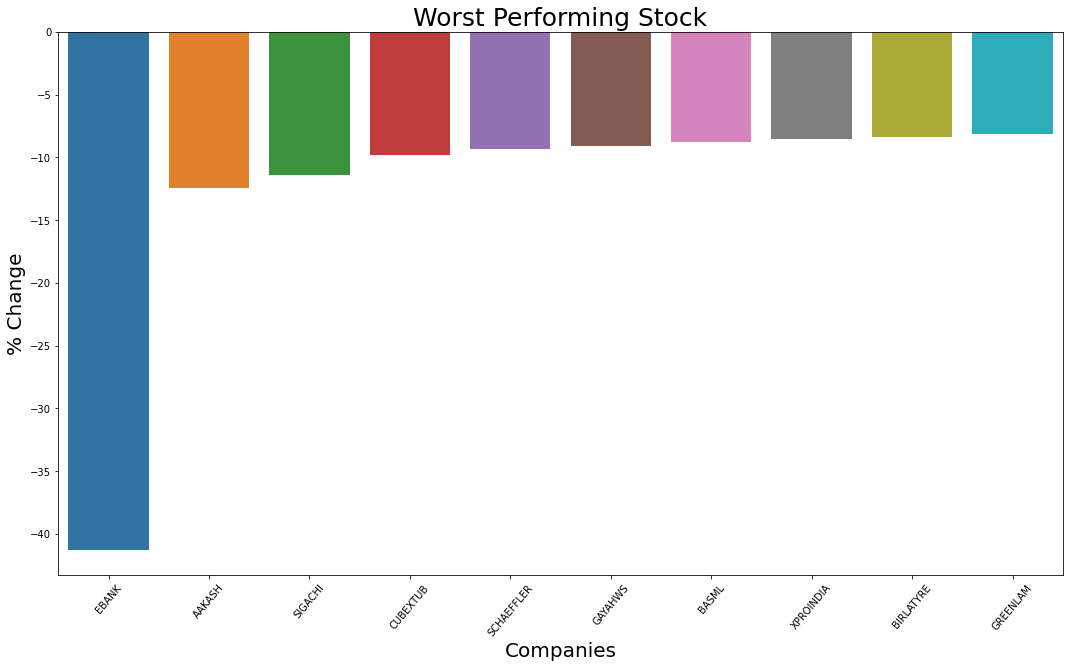

In [36]:
plt.figure(figsize = (18,10))
sns.barplot(x = low.SYMBOL, y = low.change)
plt.xticks(rotation = 50)
plt.xlabel('Companies',fontsize=20)
plt.ylabel('% Change',fontsize=20)
plt.title('Worst Performing Stock',fontsize=25)
plt.show()

The result of top perfomng and top non- performing stock is given above
Thank You...